In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df = pd.read_csv('weekly_data.csv')

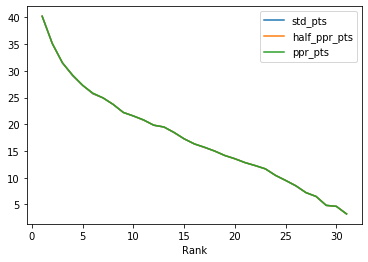

In [242]:
#QB 
df_qb = df[df['Position'] == 'QB']
df_qb_pts = df_qb.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_qb_pts = df_qb_pts.iloc[0:31]
df_qb_pts['Position'] = 'QB'
df_qb_pts.plot()

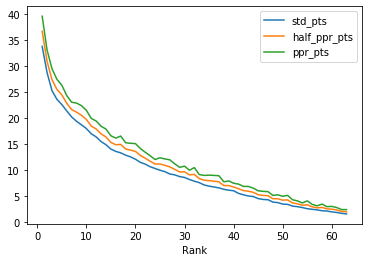

In [243]:
#RB 
df_rb = df[df['Position'] == 'RB']
df_rb_pts = df_rb.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_rb_pts = df_rb_pts.iloc[0:63]
df_rb_pts['Position'] = 'RB'
df_rb_pts.plot()

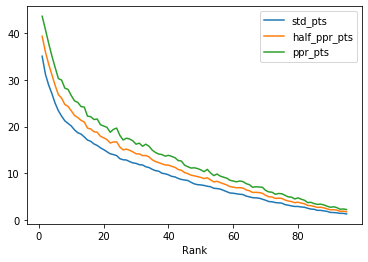

In [244]:
#WR
df_wr = df[df['Position'] == 'WR']
df_wr_pts = df_wr.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_wr_pts = df_wr_pts.iloc[0:95]
df_wr_pts['Position'] = 'WR'
df_wr_pts.plot()

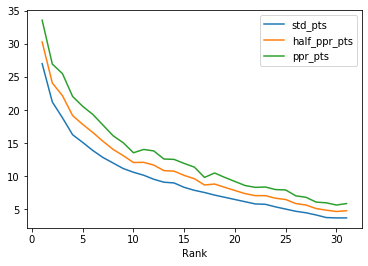

In [245]:
#TE
df_te = df[df['Position'] == 'TE']
df_te_pts = df_te.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_te_pts = df_te_pts.iloc[0:31]
df_te_pts['Position'] = 'TE'
df_te_pts.plot()

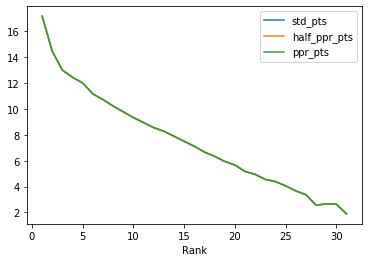

In [246]:
#K
df_k = df[df['Position'] == 'K']
df_k_pts = df_k.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_k_pts = df_k_pts.iloc[0:31]
df_k_pts['Position'] = 'K'
df_k_pts.plot()

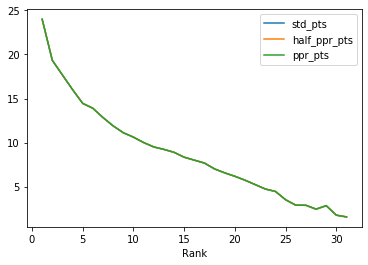

In [247]:
df_dst = df[df['Position'] == 'DST']
df_dst_pts = df_dst.groupby('Rank').agg(std_pts = ('Standard Pts', np.mean), half_ppr_pts = ('Half PPR Pts', np.mean), ppr_pts = ('PPR Pts', np.mean))
df_dst_pts = df_dst_pts.iloc[0:31]
df_dst_pts['Position'] = 'DST'
df_dst_pts.plot()

In [248]:
df_cat = pd.concat([df_qb_pts, df_rb_pts, df_wr_pts, df_te_pts, df_k_pts, df_dst_pts])

In [249]:
df.to_csv('rank_data.csv')

In [250]:
TEAMS = df['Team'].unique()
YEARS = [2022]
POSITIONS = ["QB", "RB", "WR", "TE", "K", "DST"]

In [251]:
columns =  ['QB', 'RB1', 'RB2', 'WR1', 'WR2', 'WR3', 'TE', 'K', 'DST', 'OPP_QB', 'OPP_RB1', 'OPP_RB2', 'OPP_WR1', 'OPP_WR2', 'OPP_WR3', 'OPP_TE', 'OPP_K', 'OPP_DST']
df_corr = pd.DataFrame(columns = columns)


years = df['Year'].unique()
for year in years:
    if year >= 2022:
        end = 19
    else:
        end = 18
    df_new = df[df['Year'] == year]
    for week in range(1, end):  
        df_new = df_new[df_new['Week'] == week]
        for team in TEAMS:
            df_new = df[(df['Year']==year) & (df['Week']==week) & (df['Team']==team)] 
            if not df_new.empty:
                opp = df_new['Opponent'].unique()[0]
                df_new_opp = df[(df['Year']==year) & (df['Week']==week) & (df['Team']==opp)] 


                qb_pts = df_new[df_new['Position'] == 'QB']['PPR Pts'].sum()
                try:
                    rb_one_pts = df_new[df_new['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    rb_one_pts = 0
                try:
                    rb_two_pts = df_new[df_new['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
                except:
                    rb_two_pts = 0
                try:
                    wr_one_pts = df_new[df_new['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    wr_one_pts = 0
                try:
                    wr_two_pts = df_new[df_new['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
                except:
                    wr_two_pts = 0
                try:
                    wr_three_pts = df_new[df_new['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[2]
                except:
                    wr_three_pts = 0
                try:
                    te_one_pts = df_new[df_new['Position'] == 'TE'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    te_one_pts = 0
                k_pts = df_new[df_new['Position'] == 'K']['PPR Pts'].sum()
                dst_pts = df_new[df_new['Position'] == 'DST']['PPR Pts'].sum()



                opp_qb_pts = df_new_opp[df_new_opp['Position'] == 'QB']['PPR Pts'].sum()
                try:
                    opp_rb_one_pts = df_new_opp[df_new_opp['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    opp_rb_one_pts = 0
                try:
                    opp_rb_two_pts = df_new_opp[df_new_opp['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
                except:
                    opp_rb_two_pts = 0
                try:
                    opp_wr_one_pts = df_new_opp[df_new_opp['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    opp_wr_one_pts = 0
                try:
                    opp_wr_two_pts = df_new_opp[df_new_opp['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
                except:
                    opp_wr_two_pts = 0
                try:
                    opp_wr_three_pts = df_new_opp[df_new_opp['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[2]
                except:
                    opp_wr_three_pts = 0
                try:
                    opp_te_one_pts = df_new_opp[df_new_opp['Position'] == 'TE'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    opp_te_one_pts = 0
                opp_k_pts = df_new_opp[df_new_opp['Position'] == 'K']['PPR Pts'].sum()
                opp_dst_pts = df_new_opp[df_new_opp['Position'] == 'DST']['PPR Pts'].sum()

                line = [qb_pts,rb_one_pts,rb_two_pts,wr_one_pts,wr_two_pts,wr_three_pts,te_one_pts,k_pts,dst_pts, opp_qb_pts,opp_rb_one_pts,opp_rb_two_pts,opp_wr_one_pts,opp_wr_two_pts,opp_wr_three_pts,opp_te_one_pts,opp_k_pts,opp_dst_pts]
                df_corr.loc[len(df_corr)] = line   

In [252]:
df_corr.corr()

,QB,RB1,RB2,WR1,WR2,WR3,TE,K,DST,OPP_QB,OPP_RB1,OPP_RB2,OPP_WR1,OPP_WR2,OPP_WR3,OPP_TE,OPP_K,OPP_DST
QB,1.000000,0.103997,0.113105,0.428618,0.459445,0.297044,0.272343,0.000493,-0.074059,0.084673,0.039657,-0.042187,0.163651,0.139651,0.075033,0.072643,-0.035820,-0.344097
RB1,0.103997,1.000000,0.327806,0.016685,-0.021811,-0.005109,-0.054755,0.171829,0.001732,0.039657,-0.086461,-0.110229,0.017230,-0.021935,-0.024093,0.036945,-0.059370,-0.295258
RB2,0.113105,0.327806,1.000000,-0.017487,0.034044,0.035415,-0.137127,0.029356,0.018212,-0.042187,-0.110229,-0.258283,-0.046090,-0.089997,-0.054835,0.056058,-0.077950,-0.148549
WR1,0.428618,0.016685,-0.017487,1.000000,0.535003,0.264117,-0.013931,0.064738,-0.086814,0.163651,0.017230,-0.046090,0.115841,0.075065,0.027511,0.090972,0.017494,-0.113514
WR2,0.459445,-0.021811,0.034044,0.535003,1.000000,0.527091,-0.049939,0.005185,-0.101919,0.139651,-0.021935,-0.089997,0.075065,0.052532,0.087784,0.112388,0.043449,-0.060013
WR3,0.297044,-0.005109,0.035415,0.264117,0.527091,1.000000,-0.105822,-0.044597,-0.099543,0.075033,-0.024093,-0.054835,0.027511,0.087784,0.072434,-0.004829,0.039802,-0.020480
TE,0.272343,-0.054755,-0.137127,-0.013931,-0.049939,-0.105822,1.000000,0.032145,-0.071576,0.072643,0.036945,0.056058,0.090972,0.112388,-0.004829,-0.078744,0.031652,-0.030642
K,0.000493,0.171829,0.029356,0.064738,0.005185,-0.044597,0.032145,1.000000,0.220466,-0.035820,-0.059370,-0.077950,0.017494,0.043449,0.039802,0.031652,-0.130975,-0.314614
DST,-0.074059,0.001732,0.018212,-0.086814,-0.101919,-0.099543,-0.071576,0.220466,1.000000,-0.344097,-0.295258,-0.148549,-0.113514,-0.060013,-0.020480,-0.030642,-0.314614,-0.306507
OPP_QB,0.084673,0.039657,-0.042187,0.163651,0.139651,0.075033,0.072643,-0.035820,-0.344097,1.000000,0.103997,0.113105,0.428618,0.459445,0.297044,0.272343,0.000493,-0.074059


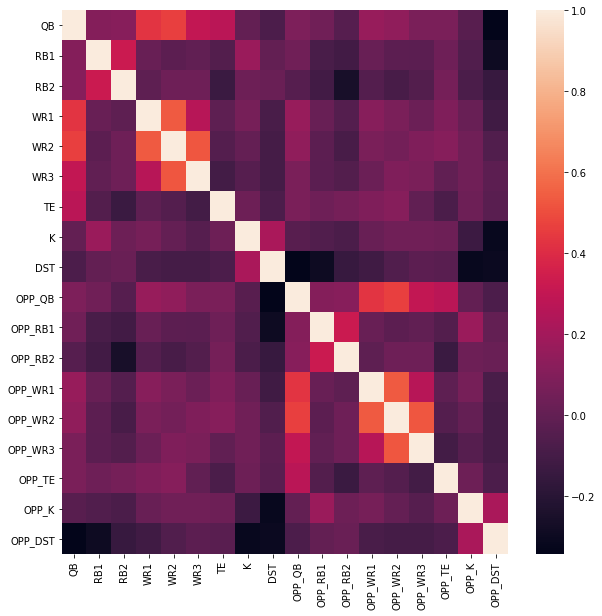

In [253]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr.corr())

In [258]:
df_corr_reshaped = df_corr.corr().stack().reset_index()

df_corr_reshaped.columns = ['Position_1', 'Position_2', 'Correlation']

mask_dups = (df_corr_reshaped[['Position_1', 'Position_2']].apply(frozenset, axis=1).duplicated()) | (df_corr_reshaped['Position_1']==df_corr_reshaped['Position_2']) 

df_corr_reshaped = df_corr_reshaped[~mask_dups]

df_corr_reshaped

,Position_1,Position_2,Correlation
1,QB,RB1,0.103997
2,QB,RB2,0.113105
3,QB,WR1,0.428618
4,QB,WR2,0.459445
5,QB,WR3,0.297044
...,...,...,...
268,OPP_WR3,OPP_K,-0.044597
269,OPP_WR3,OPP_DST,-0.099543
286,OPP_TE,OPP_K,0.032145
287,OPP_TE,OPP_DST,-0.071576


In [255]:
df_corr_reshaped.to_csv('correlation_matrix.csv')